<a href="https://colab.research.google.com/github/durumege/Spotify-Song-Genre-Analysis-Popularity-Prediction-and-Building-a-Simple-Recommendation-System/blob/main/project_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify Song & Genre Analysis, Popularity Prediction and Building a Simple Recommendation System - Group ID: 25

**Group Members:**

Ege DURUM

Osman Emre BİLEN

Ali Erinç AYAZ

 


## Introduction

<font color="black">

**Briefly discuss the background and the rationale of the project.**

We are gonna visualize descriptive statistics of the dataset. 

We will group the dataset based on genres; pop, rock, and their distributions of features such as popularity, tempo, and acousticness. 

We are gonna analyse most popular artists and songs.

We analyze how techno (90s vs 10s) and r&b (40-70 vs 00-21) changed over time.

## Exploratory Data Analysis

</font>

```
- Visualizations Descriptive Statistics
- Visualizations of Aggregated Forms Based on Features
- Analysis of the Most Popular Artists and Songs
- How Songs of Different Genres Change Over Time
```


## Visualizations Descriptive Statistics

In [ ]:
!pip install reverse_geocoder
!pip install geopy

     |████████████████████████████████| 2.3MB 5.5MB/s 
  Created wheel for reverse-geocoder: filename=reverse_geocoder-1.5.1-cp37-none-any.whl size=2268089 sha256=4c6185af855709b3f5e7e8b2952d80f367a420ba1209db260d17da8c705a4e33
  Stored in directory: /root/.cache/pip/wheels/47/05/50/b1350ff094ef91e082665b4a2f9ca551f8acea4aa55d796b26
Successfully built reverse-geocoder


In [ ]:
from google.colab import drive
drive.mount('./drive', force_remount=True)

# to be used as a prefix for all file I/O
path_prefix = './drive/My Drive'

Mounted at ./drive


In [ ]:
# Importing needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import reverse_geocoder as rg
from geopy.distance import geodesic
from scipy import stats
import seaborn as sns
from os.path import join
from os import listdir
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
# First file, needed for analyze
# we use the read_csv function
# to read the dataset into a dataframe

filename = "data.csv"
df = pd.read_csv(join(path_prefix, filename))

In [ ]:
# Second file, needed for analyze
# we use the read_csv function
# to read the dataset into a dataframe

fileGenre = "data_by_genres.csv"
dfg = pd.read_csv(join(path_prefix, fileGenre))

In [ ]:
# Third file, needed for analyze
# we use the read_csv function
# to read the dataset into a dataframe

fileArtists = "data_w_genres.csv"
dfa = pd.read_csv(join(path_prefix, fileArtists))

In [ ]:
# analyzing both numeric and object series in the data.csv file
# presenting basic information 

df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [ ]:
# dataframe stores the number of rows and columns 
# as a tuple 
# presenting basic information 

df.shape

(174389, 19)

In [ ]:
# by default returns the top 5 rows of the dataframe
# presenting basic information 

df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [ ]:
# by default returns the top 5 rows of the dataframe
# presenting basic information 

dfg.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,21st century classical,0.754600,0.284100,3.525932e+05,0.159580,0.484374,0.168580,-22.153400,0.062060,91.351000,0.143380,6.600000,4,1
1,432hz,0.485515,0.312000,1.047430e+06,0.391678,0.477250,0.265940,-18.131267,0.071717,118.900933,0.236483,41.200000,11,1
2,8-bit,0.028900,0.673000,1.334540e+05,0.950000,0.630000,0.069000,-7.899000,0.292000,192.816000,0.997000,0.000000,5,1
3,[],0.535793,0.546937,2.495312e+05,0.485430,0.278442,0.220970,-11.624754,0.101511,116.068980,0.486361,12.350770,7,1
4,a cappella,0.694276,0.516172,2.018391e+05,0.330533,0.036080,0.222983,-12.656547,0.083627,105.506031,0.454077,39.086248,7,1


In [ ]:
# by default returns the top 5 rows of the dataframe
# presenting basic information 

dfa.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[]


In [ ]:
# an information / summary of the dataframe
# presenting basic information 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [ ]:
# we used print() and len() function for
# seeing all numbers of 
# genres/songs/artists

# len() function returns the number of items
# in an object

print("Number of genres:", len(dfg))
print("Number of songs:", len(df))
print("Number of artists:", len(dfa))

Number of genres: 3232
Number of songs: 174389
Number of artists: 32539


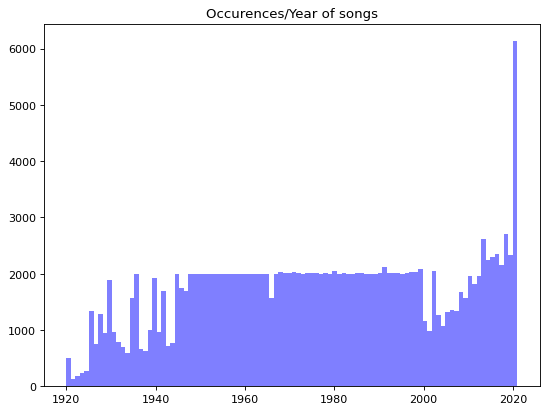

In [ ]:
# In this cell, we plot how many songs in a year produced

figure(figsize=(8, 6), dpi=80)

num_bins = 100
n, bins, patches = plt.hist(df['year'], num_bins, facecolor='blue', alpha=0.5)
plt.title('Occurences/Year of songs')
plt.show()

`We can interpret that in 2020, there is a clear rise of numbers of songs. Also, in the 70s to late 90s, we can see that there is approximately same numbers of songs produced in a year. `

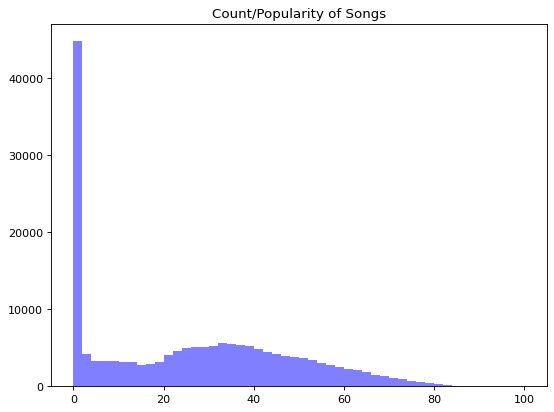

In [ ]:
figure(figsize=(8, 6), dpi=80)

num_bins = 50
n, bins, patches = plt.hist(df['popularity'], num_bins, facecolor='blue', alpha=0.5)
plt.title('Count/Popularity of Songs')
plt.show()

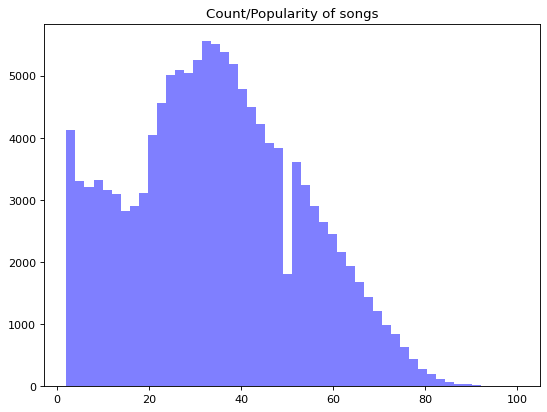

In [ ]:
# Because (0) popularity dominates the histogram, we started it from (2)
# This is a zoomed version of above cell

figure(figsize=(8, 6), dpi=80)

num_bins = 50
n, bins, patches = plt.hist(df['popularity'], num_bins, range = [2, 100], facecolor='blue', alpha=0.5)
plt.title('Count/Popularity of songs')
plt.show()

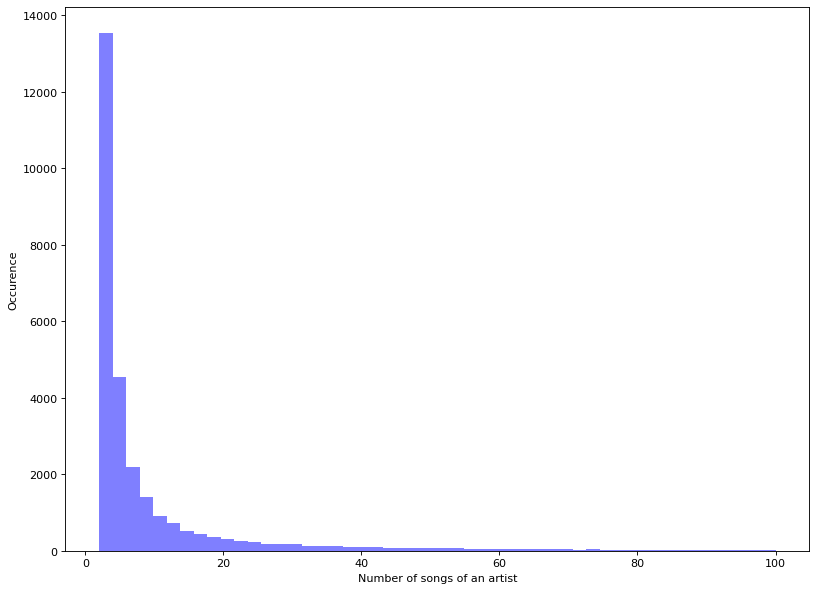

In [ ]:
figure(figsize = (12, 9), dpi = 80)

num_bins = 50
n, bins, patches = plt.hist(dfa['count'], num_bins, range = [2, 100], facecolor='blue', alpha=0.5)
plt.ylabel("Occurence")
plt.xlabel("Number of songs of an artist")
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7eff2d3c1350>],
 'caps': [<matplotlib.lines.Line2D at 0x7eff2d3c1e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7eff2d145f50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7eff2d1453d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7eff2d15cb90>,
  <matplotlib.lines.Line2D at 0x7eff2d3c1450>]}

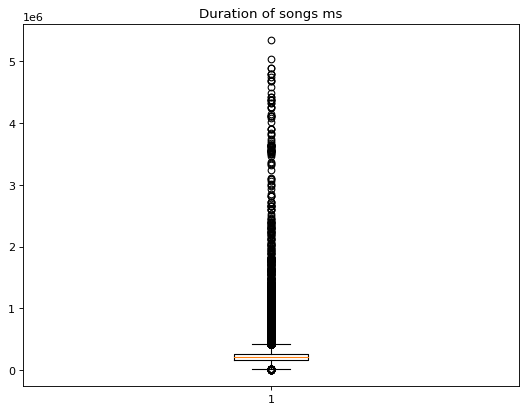

In [ ]:
# for distribute plots

figure(figsize=(8, 6), dpi=80)

plt.title("Duration of songs ms")
plt.boxplot(df["duration_ms"])

## Visualizations of Aggregated Forms Based on Features

In [ ]:
# In this cell we get a particular genre's
# (rock) data from data_w_genres.csv 

data = []
for index, row in dfa.iterrows():
  if row["genres"].count("rock") > 0:
    data.append(row)

dfAGR = pd.DataFrame(data)
dfAGR.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
8,"""Weird Al"" Yankovic",0.186821,0.650792,218352.962264,0.693189,0.000045,0.160926,-9.691151,0.082275,132.876604,0.764585,32.867925,9,1,106,"['comedy rock', 'comic', 'parody']"
16,'Til Tuesday,0.105556,0.557125,255213.500000,0.612250,0.023300,0.127588,-9.638125,0.032150,103.080250,0.532625,33.875000,0,1,16,"['boston rock', 'dance rock', 'new romantic', ..."
21,(Hed) P.E.,0.005993,0.593667,261253.333333,0.895667,0.000003,0.128200,-5.163000,0.095233,110.925000,0.413000,45.333333,6,1,6,"['alternative metal', 'industrial metal', 'nu ..."
26,...And You Will Know Us by the Trail of Dead,0.008410,0.255000,273624.000000,0.858000,0.000355,0.513000,-5.085000,0.069400,144.653000,0.237000,36.000000,7,1,2,"['alternative rock', 'dance-punk', 'double dru..."
32,10 Ft. Ganja Plant,0.195000,0.786000,277307.000000,0.752000,0.867000,0.042700,-2.859000,0.038700,136.578000,0.925000,49.000000,2,0,2,"['dub', 'east coast reggae', 'reggae', 'reggae..."


In [ ]:
# In this cell we get a particular genre's
# (pop) data from data_w_genres.csv 

data = []
for index, row in dfa.iterrows():
  if row["genres"].count("pop") > 0:
    data.append(row)

dfAGP = pd.DataFrame(data)
dfAGP.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
16,'Til Tuesday,0.105556,0.557125,255213.500000,0.612250,0.023300,0.127588,-9.638125,0.032150,103.080250,0.532625,33.875000,0,1,16,"['boston rock', 'dance rock', 'new romantic', ..."
20,(G)I-DLE,0.026794,0.534000,193085.600000,0.829800,0.000002,0.168880,-3.950800,0.061040,130.417800,0.353400,76.600000,6,0,5,"['k-pop', 'k-pop girl group']"
22,*NSYNC,0.184855,0.600253,234698.484848,0.697222,0.001293,0.227343,-6.386556,0.054446,116.974071,0.556990,46.040404,9,1,99,"['boy band', 'dance pop', 'europop', 'pop']"
29,015B,0.475276,0.624000,234111.137931,0.564793,0.000633,0.186538,-5.962414,0.066028,112.891897,0.437897,15.206897,0,1,29,"['k-indie', 'korean electropop', 'korean pop']"
34,"10,000 Maniacs",0.182434,0.588000,235077.529412,0.556506,0.002059,0.206265,-13.217765,0.039018,115.606118,0.616176,37.882353,9,1,34,"['folk', 'lilith', 'mellow gold', 'new wave po..."


In [ ]:
# to see basic data about genres;
# rock and pop

print("Pop len:", len(dfAGP))
print("Rock len:", len(dfAGR))

Pop len: 5183
Rock len: 3964


`This shows that pop songs are more produced than rock songs.`

In [ ]:
# In this cell, we get mean and median values
# of popularity of genres (rock and pop)

rock_mean = dfAGR["popularity"].mean()
pop_mean = dfAGP["popularity"].mean()

rock_med = dfAGR["popularity"].median()
pop_med = dfAGP["popularity"].median()

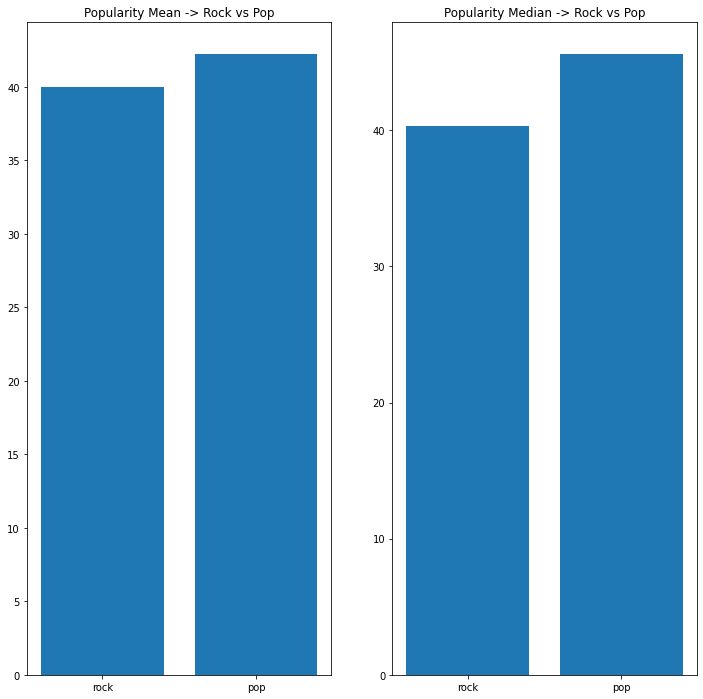

In [ ]:
# In this cell we try to show and analyze their mean and median 
# values with using bar charts to see clear

fig, ax = plt.subplots(figsize = (12, 12), nrows = 1, ncols = 2)

# Making chart's axes x and y
plt_x = ["rock", "pop"]
plt_y_mean = [rock_mean, pop_mean]
plt_y_med = [rock_med, pop_med]

# Creating bar charts
ax[0].bar(plt_x, plt_y_mean)
ax[1].bar(plt_x, plt_y_med)

# Making titles for not mixing mean and median values
ax[0].set_title("Popularity Mean -> Rock vs Pop")
ax[1].set_title("Popularity Median -> Rock vs Pop")

plt.show()



```
We can analyze from first bar chart that pop is more popular than rock.

In the second bar chart, it is more clear that pop's median is higher than rock's median.
```



In [ ]:
# In this cell, we get mean values
# of acousticness and tempo of genres (rock and pop)

rock_ac = dfAGR["acousticness"].mean()
pop_ac = dfAGP["acousticness"].mean()

rock_tempo = dfAGR["tempo"].mean()
pop_tempo = dfAGP["tempo"].mean()

print(rock_tempo, pop_tempo)

122.65010329274182 120.93348531816262


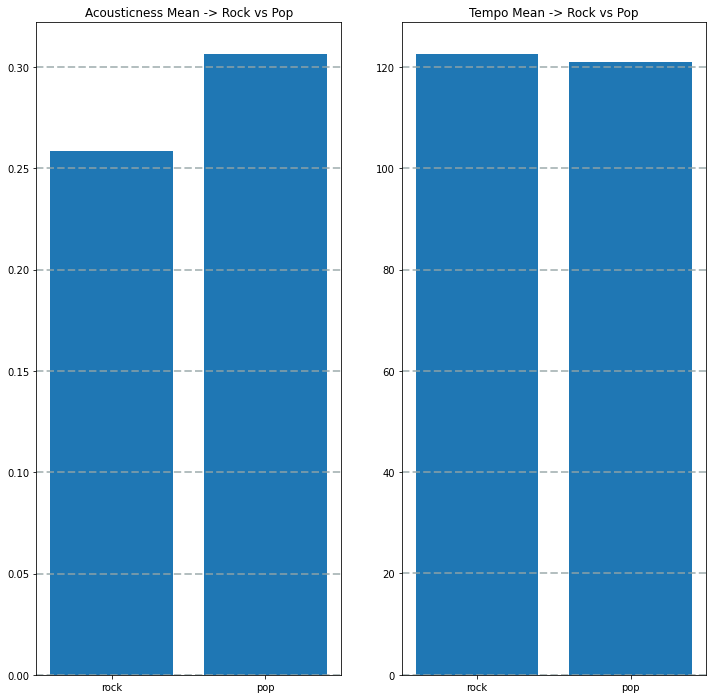

In [ ]:
fig, ax = plt.subplots(figsize = (12, 12), nrows = 1, ncols = 2)

# Making chart's axes x and y
plt_x = ["rock", "pop"]
plt_y_ac = [rock_ac, pop_ac]
plt_y_tempo = [rock_tempo, pop_tempo]

# Creating bar charts and use grid for see data more clear 
# and understandable
ax[0].bar(plt_x, plt_y_ac)
ax[0].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax[1].bar(plt_x, plt_y_tempo)
ax[1].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

# Making titles for not mixing mean values
ax[0].set_title("Acousticness Mean -> Rock vs Pop")
ax[1].set_title("Tempo Mean -> Rock vs Pop")

plt.show()



```
We analyzed two specifications which were acousticness and tempo in 
these bar charts. It is clear that according to acousticness pop's mean is higher than rock's mean. 
According to tempo rock's mean is higher than pop's mean.
```



## Analysis of the Most Popular Artists and Songs

In [ ]:
# execute this cell to authorize the notebook

from google.colab import drive
drive.mount("./drive", force_remount=True)

Mounted at ./drive


In [ ]:
from os.path import join 

path_prefix = "./drive/My Drive"
fname = "data.csv"

# read and print the whole content of the file
with open(join(path_prefix, fname), "r") as f:
  print(f.read())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
!pip install reverse_geocoder
!pip install geopy

In [ ]:
from google.colab import drive
drive.mount('./drive', force_remount=True)

path_prefix = './drive/My Drive'

Mounted at ./drive


In [ ]:
# Importing needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import reverse_geocoder as rg
from geopy.distance import geodesic
from scipy import stats
import seaborn as sns
from os.path import join
from os import listdir
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
# we use the read_csv function
# to read the dataset into a dataframe

filename = "data.csv"
df = pd.read_csv(join(path_prefix, filename))

In [ ]:
# sorting datas by descending popularity

df.sort_values(by=['popularity'], inplace=True, ascending=False) 

In [ ]:
# cleaning up data and picking artists more than 90 popularity

df[['artists','name','popularity']][(df['popularity'] >= 90) & (df['popularity'] <= 100)] 

,artists,name,popularity
20062,['Olivia Rodrigo'],drivers license,100
19862,"['24kGoldn', 'iann dior']",Mood (feat. iann dior),96
19866,['Ariana Grande'],positions,96
19886,"['Bad Bunny', 'Jhay Cortez']",DÁKITI,95
19976,['KAROL G'],BICHOTA,95
19868,['Ariana Grande'],34+35,94
19870,['CJ'],Whoopty,94
19872,['The Kid LAROI'],WITHOUT YOU,94
19876,['Billie Eilish'],Therefore I Am,94
19928,"['Bad Bunny', 'ROSALÍA']",LA NOCHE DE ANOCHE,94


## How Songs of Different Genres Change Over Time

In [ ]:
# In this cell we get artists and genres data 
# from data_w_genres.csv 

data = []
for index, row in dfa.iterrows():
  data.append(row[['artists', 'genres']])

dfAAA = pd.DataFrame(data)
dfAAA.head()

,artists,genres
0,"""Cats"" 1981 Original London Cast",['show tunes']
1,"""Cats"" 1983 Broadway Cast",[]
2,"""Fiddler On The Roof” Motion Picture Chorus",[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",[]


In [ ]:
# by default returns the top 5 rows of the dataframe
# presenting basic information 

df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
20062,0.721,['Olivia Rodrigo'],0.585,242014,0.436,1,7lPN2DXiMsVn7XUKtOW1CS,0.000013,10,0.1050,-8.761,1,drivers license,100,2021-01-08,0.0601,143.874,0.132,2021
19862,0.221,"['24kGoldn', 'iann dior']",0.700,140526,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),96,2020-07-24,0.0369,90.989,0.756,2020
19866,0.468,['Ariana Grande'],0.737,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015,0.682,2020
19886,0.401,"['Bad Bunny', 'Jhay Cortez']",0.731,205090,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,DÁKITI,95,2020-10-30,0.0544,109.928,0.145,2020
19976,0.212,['KAROL G'],0.863,178947,0.666,1,7vrJn5hDSXRmdXoR30KgF1,0.000493,1,0.1030,-4.158,0,BICHOTA,95,2020-10-23,0.1520,163.908,0.838,2020


In [ ]:
# To merge data.csv and data_w_genres.csv
# files we need to make their artists name same

df['genres'] = ""
data = []

# Iteration for getting same artists 
for i, row in dfAAA.iterrows():
  row["artists"] = "['" + row["artists"] + "']"
  data.append(row)

dfAAB = pd.DataFrame(data)
dfAAB.head()

,artists,genres
0,"['""Cats"" 1981 Original London Cast']",['show tunes']
1,"['""Cats"" 1983 Broadway Cast']",[]
2,"['""Fiddler On The Roof” Motion Picture Chorus']",[]
3,"['""Fiddler On The Roof” Motion Picture Orchest...",[]
4,"['""Joseph And The Amazing Technicolor Dreamcoa...",[]


In [ ]:
# Merging data.csv file and different file 
# that we created for this process which is
# (dfAAB)

output1 = pd.merge(df, dfAAB, on='artists', how='inner')

In [ ]:
# In this cell we get genres (techno and r&b) data 
# from output1 that we created 

dataT = []
dataRB = []
for index, row in output1.iterrows():
  if row["genres_y"].count("techno") > 0:
    dataT.append(row)

  if row["genres_y"].count("r&b") > 0:
    dataRB.append(row)

dfT = pd.DataFrame(dataT)
dfRB = pd.DataFrame(dataRB)

In [ ]:
# getting techno's specific data (time interval (1990 to 2000))

dfT90 = dfT
dfT90 = dfT90[(dfT90['year'] >= 1990) & (dfT90['year'] <= 2000)]

In [ ]:
# getting techno's specific data (time interval (2010 to 2021))

dfT10 = dfT
dfT10 = dfT10[(dfT10['year'] >= 2010) & (dfT10['year'] <= 2021)]

In [ ]:
# In this cell, we get mean values of danceability 
# and tempo of genres (techno and r&b) 

techno_tempo_mean_90 = dfT90["tempo"].mean()
techno_tempo_mean_10 = dfT10["tempo"].mean()

techno_dance_mean_90 = dfT90["danceability"].mean()
techno_dance_mean_10 = dfT10["danceability"].mean()

In [ ]:
# In this cell, we get mean values of instrumentalness 
# and acousticness of genres (techno and r&b) with given interval time

dfRB40 = dfRB
dfRB00 = dfRB

dfRB40 = dfRB40[(dfRB40['year'] >= 1940) & (dfRB['year'] <= 1970)]
dfRB00 = dfRB00[(dfRB00['year'] >= 2000) & (dfRB['year'] <= 2021)]

rb_inst_mean_40 = dfRB40["instrumentalness"].mean()
rb_inst_mean_00 = dfRB00["instrumentalness"].mean()

rb_acous_mean_40 = dfRB40["acousticness"].mean()
rb_acous_mean_00 = dfRB00["acousticness"].mean()

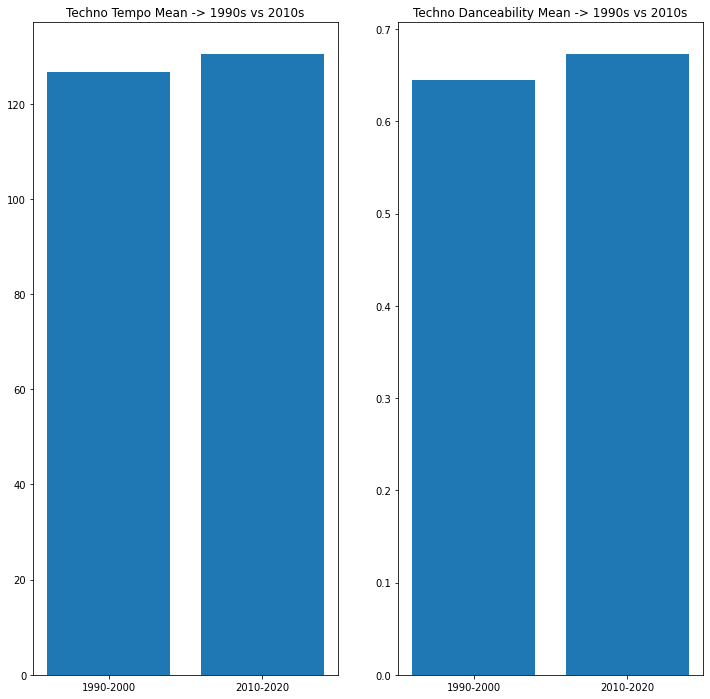

In [ ]:
fig, ax = plt.subplots(figsize = (12, 12), nrows = 1, ncols = 2)

# Making chart's axes x and y
plt_x = ["1990-2000", "2010-2020"]
plt_y_mean = [techno_tempo_mean_90, techno_tempo_mean_10]
plt_y_med = [techno_dance_mean_90, techno_dance_mean_10]

# Creating bar charts
ax[0].bar(plt_x, plt_y_mean)
ax[1].bar(plt_x, plt_y_med)

# Making titles for not mixing mean values
ax[0].set_title("Techno Tempo Mean -> 1990s vs 2010s")
ax[1].set_title("Techno Danceability Mean -> 1990s vs 2010s")

plt.show()



```
In first bar chart, we compare 1990-2000 and 2010-2020 techno's tempo mean. We can analyze that in 20s, techno producers increase tempo in their song. 

In second bar chart, just like tempo, danceability increases when time passes. 

We can interpret that in 00s, there is an increment in tempo and danceability in techno songs.
```



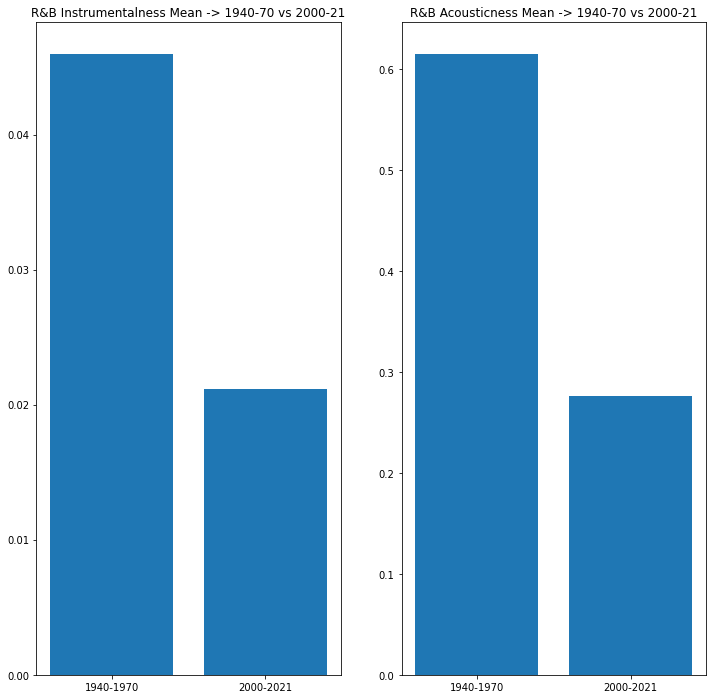

In [ ]:
fig, ax = plt.subplots(figsize = (12, 12), nrows = 1, ncols = 2)

# Making chart's axes x and y
plt_x = ["1940-1970", "2000-2021"]
plt_y_mean = [rb_inst_mean_40, rb_inst_mean_00]
plt_y_med = [rb_acous_mean_40, rb_acous_mean_00]

# Creating bar charts
ax[0].bar(plt_x, plt_y_mean)
ax[1].bar(plt_x, plt_y_med)

# Making titles for not mixing mean values
ax[0].set_title("R&B Instrumentalness Mean -> 1940-70 vs 2000-21")
ax[1].set_title("R&B Acousticness Mean -> 1940-70 vs 2000-21")

plt.show()



```
We want to see more old datas and nowadays data to see differences instrumentalness and acousticness in r&b songs. Hence, we looked at 1940-1970 and 2000-2021 datas. 

Both of the charts shows that instrumentalness and acousticness decreased with time. But this decrement is big according to other bar charts that we analyze. 

This might be because of instruments used in r&b songs. Nowadays, producers uses different ways to produce a song. This might affect their acousticness and instrumentalness.
```

